In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sc_regmod.io import read_phylip_file, read_phenotypes_file, get_dataset_filepaths, read_phylip_file

In [2]:
FILEPATH = "C:\\Users\\Hector\\Desktop\\code\\sc_regmod\\dataset\\fenotipos\\fenotipos.csv"

In [3]:
phenotypes_df = read_phenotypes_file(FILEPATH)

In [4]:
phenotypes_df.head()

,Standard,Haploide-Diploide,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC,Ecological info
0,AAA,haploide-euploide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domesticated (wine)
1,AAB,haploide-euploide,0.4400,0.01612,9.220,9.497,0.4115,0.01132,10.390,6.954,0.935227,0.702233,1.126898,0.732231,Domesticated (non-wine)
2,AAC,diploides-euploides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domesticated (non-wine)
3,AAD,---,1.0620,0.03776,6.062,25.590,0.6657,0.02605,7.240,15.840,0.626836,0.689883,1.194325,0.618992,Domesticated (non-wine)
4,AAE,haploide-euploide,0.9033,0.03103,9.111,18.860,0.6704,0.01607,6.166,12.300,0.742168,0.517886,0.676764,0.652174,Domesticated (wine)


In [5]:
phenotypes_df.keys()

Index(['Standard', 'Haploide-Diploide', 'SM300-Efficiency', 'SM300-Rate',
       'SM300-Lag', 'SM300-AUC', 'SM60-Efficiency', 'SM60-Rate', 'SM60-Lag',
       'SM60-AUC', 'Ratio-Efficiency', 'Ratio-Rate', 'Ratio-Lag', 'Ratio-AUC',
       'Ecological info'],
      dtype='object')

Chequeamos si existen valores NAN para todas las columnas, sacamos el valor total por columna

In [6]:
phenotypes_missing_data = []
for key in phenotypes_df.keys():
    if key != "Standard" and key != "Haploide-Diploide" and key != "Ecological info":
        has_na = {}
        has_na[key] = phenotypes_df[key].isnull().sum()
        phenotypes_missing_data.append(has_na)

In [7]:
print(phenotypes_missing_data)

[{'SM300-Efficiency': 64}, {'SM300-Rate': 64}, {'SM300-Lag': 64}, {'SM300-AUC': 64}, {'SM60-Efficiency': 64}, {'SM60-Rate': 64}, {'SM60-Lag': 64}, {'SM60-AUC': 64}, {'Ratio-Efficiency': 64}, {'Ratio-Rate': 64}, {'Ratio-Lag': 64}, {'Ratio-AUC': 64}]


In [8]:
print(round(64/phenotypes_df.shape[0], 2))

0.06


Para todas las columnas existen valores NA, lo que representa el **0,06%** de los datos totales, por lo que se limpia el dataset eliminando las filas que presenten valores NaN.

In [9]:
phenotypes_df = phenotypes_df.dropna(axis=0, how='any')
phenotypes_df = phenotypes_df.reset_index(drop=True)

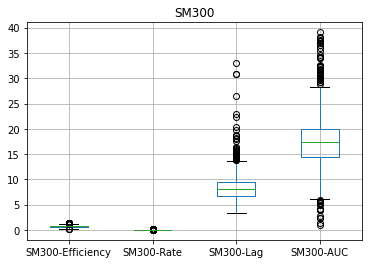

In [10]:
phenotypes_df.boxplot(column=['SM300-Efficiency', 'SM300-Rate', 'SM300-Lag', 'SM300-AUC'])
plt.title('SM300')
plt.show()

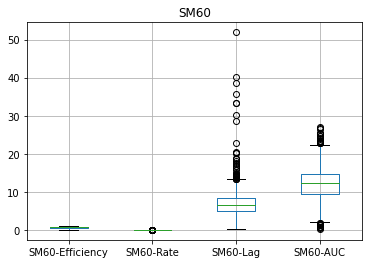

In [11]:
phenotypes_df.boxplot(column=['SM60-Efficiency', 'SM60-Rate', 'SM60-Lag', 'SM60-AUC'])
plt.title('SM60')
plt.show()

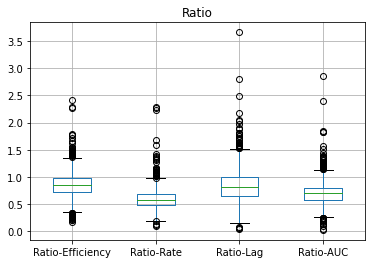

In [12]:
phenotypes_df.boxplot(column=['Ratio-Efficiency', 'Ratio-Rate', 'Ratio-Lag', 'Ratio-AUC'])
plt.title('Ratio')
plt.show()

<AxesSubplot:>

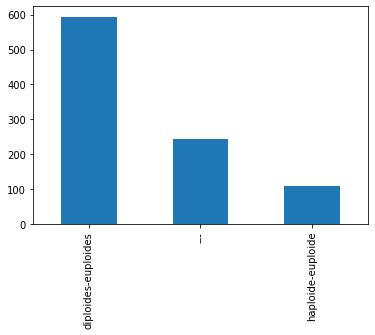

In [13]:
phenotypes_df['Haploide-Diploide'].value_counts().plot(kind='bar')

<AxesSubplot:>

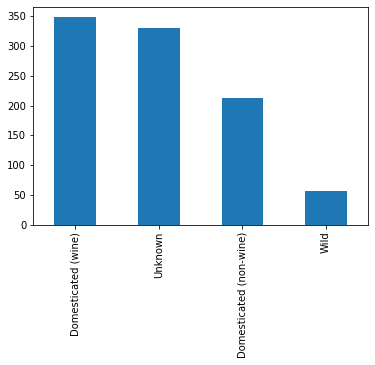

In [14]:
phenotypes_df['Ecological info'].value_counts().plot(kind='bar')

## Test ANOVA

Leemos el directorios con el dataset, extraemos todos los 'path' a los archivos (ya comprimidos o reducidos) e iteramos por cada uno de ellos. De esta forma no cargamos todo el dataset en memoria.

In [15]:
PHYLIP_FILEPATH="C:\\Users\\Hector\\Desktop\\code\\sc_regmod\\dataset\\compressed_sequences"

In [16]:
paths = get_dataset_filepaths(PHYLIP_FILEPATH, ".phylip")

En el ciclo realizamos las siguientes operaciones:

- Leemos los datos del archivo.
- Creamos un dataframe especifico para este archivo.
- Por cada columna en la secuencia:
    - Extraemos los genes presentes en el archivo de fenotipos de la columna.
    - 
   

In [17]:
# #BORRAR
# just_for_1_file = 0

# for path in paths:
#     if just_for_1_file == 0:
#         data = read_phylip_file(path)
        
#         print(data)
#         just_for_1_file = just_for_1_file + 1

Filtramos los datos y nos quedamos con los genes presentes en el archivo de fenotipos (Esto porque removimos filas del archivo de fenotipos)

In [18]:
print(phenotypes_df.index)

RangeIndex(start=0, stop=947, step=1)


In [21]:
data = read_phylip_file(paths[0])

new_columns = {}
for col in range(data.get_alignment_length()):
    col_seq = []
    for row in range(len(data)):
        for id in phenotypes_df['Standard'].tolist():
            if id == data[row].id:
                col_seq.append(data[row, col])
    
    #Add to dataframe
    new_key = "x" + str(col)
    new_columns[new_key] = pd.Series(col_seq, index=phenotypes_df.index, name=new_key)
    
        
        
# for row in data:
#     t = {}
#     t[row.id] = list(row.seq)
#     test_dataframe.append(t)
#     # print(list(row.seq[:5]))

# print(test_dataframe)

temp = pd.DataFrame(new_columns)
anova_data = pd.concat([phenotypes_df, temp], axis=1)

In [22]:
# phenotypes_df.to_csv("C:\\Users\\Hector\\Desktop\\code\\sc_regmod\\dataset\\df.csv")

In [35]:
# print(anova_data.head())
print(anova_data.iloc[:, 15])
print(phenotypes_df.keys()[2:-1])

0      g
1      g
2      g
3      g
4      g
      ..
942    g
943    g
944    g
945    g
946    g
Name: x0, Length: 947, dtype: object
Index(['SM300-Efficiency', 'SM300-Rate', 'SM300-Lag', 'SM300-AUC',
       'SM60-Efficiency', 'SM60-Rate', 'SM60-Lag', 'SM60-AUC',
       'Ratio-Efficiency', 'Ratio-Rate', 'Ratio-Lag', 'Ratio-AUC'],
      dtype='object')


In [50]:
START_GEN_ROW = 15

gen_means = []
#Calculamos las medias para cada gen

for gen in anova_data.iloc[:, 15].unique():
    temp = {}
    values = anova_data[anova_data.iloc[:, 15] == gen].mean(numeric_only=True)
    for index, value in values.items():
        temp[index] = value
    
    gen_means.append(temp)

# print(gen_means[0])
    
prev_data = {}

for key in phenotypes_df.keys()[2:-1]:
    prev_data[key] = []
    
    for data in gen_means:
        prev_data[key].append(data[key])

prev_data['seq'] = anova_data.iloc[:, 15].unique()

In [52]:
# print(anova_data[anova_data.iloc[:, 15] == gen].mean(numeric_only=True))
# test = anova_data[anova_data.iloc[:, 15] == gen].mean(numeric_only=True)
# type(test)
# print(prev_data)
df_to_test = pd.DataFrame(prev_data)
df_to_test.head()

,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC,seq
0,0.74335,0.030697,8.521643,17.545159,0.623385,0.017588,7.171276,12.136119,0.859312,0.600287,0.841906,0.709660,g
1,0.80015,0.036165,9.615500,19.095000,0.597600,0.017305,7.926500,11.465000,0.750602,0.477050,0.819538,0.598195,k
2,0.67160,0.025450,7.878000,15.600000,0.815800,0.022250,8.180000,15.070000,1.214711,0.874263,1.038335,0.966026,t


In [53]:
fvalue, pvalue = stats.f_oneway(df_to_test['SM300-Efficiency'], df_to_test['SM300-Rate'], df_to_test['SM300-Lag'], df_to_test['SM300-AUC'],
                                df_to_test['SM60-Efficiency'],  df_to_test['SM60-Rate'],  df_to_test['SM60-Lag'],  df_to_test['SM60-AUC'],
                                df_to_test['Ratio-Efficiency'], df_to_test['Ratio-Rate'], df_to_test['Ratio-Lag'], df_to_test['Ratio-AUC'])
print(fvalue, pvalue)

159.51505151891865 1.175897341520585e-19


In [54]:
fvalue, pvalue = stats.f_oneway(df_to_test['SM300-Efficiency'], df_to_test['SM300-Rate'], df_to_test['SM300-Lag'], df_to_test['SM300-AUC'])
print(fvalue, pvalue)

206.82301307682235 6.428388157222915e-08


### ====================================================

Obtengo un set haciendo la interseccion entre la columna y los data_ids.

In [19]:
# uniques_data_ids = set(phenotypes_df['Standard']).intersection(data_ids)
# len(uniques_data_ids)

947

In [20]:
# selected_seq = []
# rows = len(uniques_data_ids)



# for id in uniques_data_ids:
    

# for i in range(rows):
#     if data[i].id in uniques_data_ids:
#         x = {}
#         x['id'] = data[i].id
#         x['value'] = data[i][0]
        
#         selected_seq.append(x)

In [21]:
#print(selected_seq)

Creamos el dataframe con el que haremos el ANOVA

In [22]:
anova_df = phenotypes_df

In [23]:
# for id in uniques_data_ids:
#     if anova_df[anova_df["Standard"] == id]:
#         print(id)
        
selected_seq = []
for id_dataframe in anova_df["Standard"]:
    for row in data:
        if id_dataframe == row.id:
            selected_seq.append(row[0])
            #print(f"anova_df: {id_dataframe} ; data: {row[0]}")

#print(selected_seq)

In [24]:
anova_df.insert(anova_df.shape[1], 'seq', selected_seq)

In [25]:
anova_df.head()

,Standard,Haploide-Diploide,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC,Ecological info,seq
1,AAB,haploide-euploide,0.4400,0.01612,9.220,9.497,0.4115,0.01132,10.390,6.954,0.935227,0.702233,1.126898,0.732231,Domesticated (non-wine),g
3,AAD,---,1.0620,0.03776,6.062,25.590,0.6657,0.02605,7.240,15.840,0.626836,0.689883,1.194325,0.618992,Domesticated (non-wine),g
4,AAE,haploide-euploide,0.9033,0.03103,9.111,18.860,0.6704,0.01607,6.166,12.300,0.742168,0.517886,0.676764,0.652174,Domesticated (wine),g
5,AAG,haploide-euploide,0.5714,0.02492,13.140,11.470,0.3127,0.01012,9.617,6.117,0.547252,0.406100,0.731887,0.533304,Unknown,g
6,AAH,haploide-euploide,1.1170,0.02765,22.390,8.306,0.7819,0.02157,13.020,11.530,0.700000,0.780108,0.581510,1.388153,Unknown,g


Seleccionamos columnas de interés para realizar ANOVA

In [26]:
anova_df.seq.unique()

array(['g', 't', 'k'], dtype=object)

In [49]:
g_mean = anova_df[anova_df['seq'] == 'g'].mean(numeric_only=True)
t_mean = anova_df[anova_df['seq'] == 't'].mean(numeric_only=True)
k_mean = anova_df[anova_df['seq'] == 'k'].mean(numeric_only=True)

prev_data = {
    'seq': ['g', 't', 'k'],
    'SM300-Efficiency': [g_mean['SM300-Efficiency'], t_mean['SM300-Efficiency'], k_mean['SM300-Efficiency']],
    'SM300-Rate':       [g_mean['SM300-Rate'],       t_mean['SM300-Rate'],       k_mean['SM300-Rate']],
    'SM300-Lag':        [g_mean['SM300-Lag'],        t_mean['SM300-Lag'],        k_mean['SM300-Lag']],
    'SM300-AUC':        [g_mean['SM300-AUC'],        t_mean['SM300-AUC'],        k_mean['SM300-AUC']],
    'SM60-Efficiency':  [g_mean['SM60-Efficiency'],  t_mean['SM60-Efficiency'],  k_mean['SM60-Efficiency']],
    'SM60-Rate':        [g_mean['SM60-Rate'],        t_mean['SM60-Rate'],        k_mean['SM60-Rate']],
    'SM60-Lag':         [g_mean['SM60-Lag'],         t_mean['SM60-Lag'],         k_mean['SM60-Lag']],
    'SM60-AUC':         [g_mean['SM60-AUC'],         t_mean['SM60-AUC'],         k_mean['SM60-AUC']],
    'Ratio-Efficiency': [g_mean['Ratio-Efficiency'], t_mean['Ratio-Efficiency'], k_mean['Ratio-Efficiency']],
    'Ratio-Rate':       [g_mean['Ratio-Rate'],       t_mean['Ratio-Rate'],       k_mean['Ratio-Rate']],
    'Ratio-Lag':        [g_mean['Ratio-Lag'],        t_mean['Ratio-Lag'],        k_mean['Ratio-Lag']],
    'Ratio-AUC':        [g_mean['Ratio-AUC'],        t_mean['Ratio-AUC'],        k_mean['Ratio-AUC']],
}

# y_mean = anova_df[anova_df['seq'] == 'y'].mean()
# t_mean = anova_df[anova_df['seq'] == 't'].mean()

# prev_data = {
#     'seq': ['t', 'y'],
#     'SM300-Efficiency': [t_mean['SM300-Efficiency'], y_mean['SM300-Efficiency']],
#     'SM300-Rate':       [t_mean['SM300-Rate'],       y_mean['SM300-Rate']],
#     'SM300-Lag':        [t_mean['SM300-Lag'],        y_mean['SM300-Lag']],
#     'SM300-AUC':        [t_mean['SM300-AUC'],        y_mean['SM300-AUC']],
#     'SM60-Efficiency':  [t_mean['SM60-Efficiency'],  y_mean['SM60-Efficiency']],
#     'SM60-Rate':        [t_mean['SM60-Rate'],        y_mean['SM60-Rate']],
#     'SM60-Lag':         [t_mean['SM60-Lag'],         y_mean['SM60-Lag']],
#     'SM60-AUC':         [t_mean['SM60-AUC'],         y_mean['SM60-AUC']],
#     'Ratio-Efficiency': [t_mean['Ratio-Efficiency'], y_mean['Ratio-Efficiency']],
#     'Ratio-Rate':       [t_mean['Ratio-Rate'],       y_mean['Ratio-Rate']],
#     'Ratio-Lag':        [t_mean['Ratio-Lag'],        y_mean['Ratio-Lag']],
#     'Ratio-AUC':        [t_mean['Ratio-AUC'],        y_mean['Ratio-AUC']],
# }

anova2 = pd.DataFrame(prev_data)
anova2.head()


,seq,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC
0,g,0.742807,0.030674,8.520706,17.532882,0.622912,0.017565,7.172336,12.121723,0.859324,0.600017,0.842111,0.709315
1,t,1.123000,0.051470,9.042000,27.520000,0.806900,0.024010,8.964000,15.240000,0.718522,0.466485,0.991374,0.553779
2,k,0.830750,0.034025,9.476000,18.930000,0.825150,0.027370,7.034500,18.175000,0.993440,0.808315,0.746644,0.967409


In [50]:
fvalue, pvalue = stats.f_oneway(anova2['SM300-Efficiency'], anova2['SM300-Rate'], anova2['SM300-Lag'], anova2['SM300-AUC'],
                                anova2['SM60-Efficiency'], anova2['SM60-Rate'], anova2['SM60-Lag'], anova2['SM60-AUC'],
                                anova2['Ratio-Efficiency'], anova2['Ratio-Rate'], anova2['Ratio-Lag'], anova2['Ratio-AUC'])
print(fvalue, pvalue)

44.98367895449646 2.6949036408909837e-13


In [31]:
test_anova = anova_df.iloc[:, 2:14]
test_anova['seq'] = anova_df.iloc[:, 15]
test_anova.reset_index()
test_anova

,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC,seq
1,0.4400,0.01612,9.220,9.497,0.4115,0.01132,10.390,6.954,0.935227,0.702233,1.126898,0.732231,g
3,1.0620,0.03776,6.062,25.590,0.6657,0.02605,7.240,15.840,0.626836,0.689883,1.194325,0.618992,g
4,0.9033,0.03103,9.111,18.860,0.6704,0.01607,6.166,12.300,0.742168,0.517886,0.676764,0.652174,g
5,0.5714,0.02492,13.140,11.470,0.3127,0.01012,9.617,6.117,0.547252,0.406100,0.731887,0.533304,g
6,1.1170,0.02765,22.390,8.306,0.7819,0.02157,13.020,11.530,0.700000,0.780108,0.581510,1.388153,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0.9388,0.03685,8.016,22.120,0.9171,0.03812,6.137,12.010,0.976885,1.034464,0.765594,0.542948,g
987,0.7786,0.03354,6.953,20.020,0.5408,0.01095,7.606,8.117,0.694580,0.326476,1.093916,0.405445,g
1008,0.8823,0.03675,10.080,19.760,0.7659,0.02743,10.740,15.270,0.868072,0.746395,1.065476,0.772773,g
1009,0.5738,0.02647,8.164,14.610,0.4249,0.01096,8.709,7.282,0.740502,0.414054,1.066756,0.498426,g


In [29]:
fvalue, pvalue = stats.f_oneway(test_anova['SM300-Efficiency'], test_anova['SM300-Rate'], test_anova['SM300-Lag'], test_anova['SM300-AUC'],
                                test_anova['SM60-Efficiency'], test_anova['SM60-Rate'], test_anova['SM60-Lag'], test_anova['SM60-AUC'],
                                test_anova['Ratio-Efficiency'], test_anova['Ratio-Rate'], test_anova['Ratio-Lag'], test_anova['Ratio-AUC'])
print(fvalue, pvalue)

5317.907701616452 0.0
